In [2]:
# Import libraries
from energy_analysis import AnalysisConfig, WindEnergyPipeline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Configure matplotlib for better plots
plt.style.use('default')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [3]:
# Setup configuration and run analysis
config = AnalysisConfig()

print("🔧 Configuration:")
print(f"📍 Site: {config.site.latitude:.3f}°N, {config.site.longitude:.3f}°W")
print(f"🏭 Turbine: {config.wind.turbine_name}")
print(f"🌀 Wake Model: {config.wind.wake_model}")
print(f"📊 Sectors: {config.wind.n_sectors}")
print()

# Create and run wind analysis
print("🚀 Running wind analysis...")
wind = WindEnergyPipeline(config.wind, config.site)

# Run complete pipeline
wind.run_full_pipeline()

print("✅ Analysis complete!")
print(f"🔋 Annual Energy: {wind.results.get('annual_energy_GWh', 'N/A')} GWh")
print(f"🏗️ Number of turbines: {len(wind.layout)}")


🔧 Configuration:
📍 Site: 19.718°N, -71.356°W
🏭 Turbine: Nordex N164
🌀 Wake Model: BastankhahGaussianDeficit
📊 Sectors: 16

🚀 Running wind analysis...
[WindPipeline] Running full wind analysis pipeline...
[WindPipeline] Loading turbine from Inputdata/Nordex N164.csv
[WindPipeline] Turbine loaded: Nordex N164
[WindPipeline] Creating site from Inputdata/vortex.serie.850689.10y 164m UTC-04.0 ERA5.txt
[WindPipeline] Time period: 2014-01-01 00:00 to 2024-12-31 23:59


c:\Users\klaus\klauspython\Latam\site_galvian\create_site.py:56: RuntimeWarning: divide by zero encountered in scalar divide
  ti = [0.12*(0.75+5.6/x) for x in ws]


[WindPipeline] Site created successfully
[WindPipeline] Loading layout from Inputdata/turbine_layout_13.csv
[WindPipeline] Layout loaded: 13 turbines
[WindPipeline] Setting up wind farm model with BastankhahGaussianDeficit
[WindPipeline] Wind farm model setup complete
[WindPipeline] Running wind farm simulation...
[WindPipeline] Simulation complete: 96360 timesteps, 13 turbines
[WindPipeline] Processing simulation results...
[WindPipeline] Results processed. Annual energy: 290.91 GWh
✅ Analysis complete!
🔋 Annual Energy: 290.91133956004654 GWh
🏗️ Number of turbines: 13


📍 Creating wind farm layout plot...


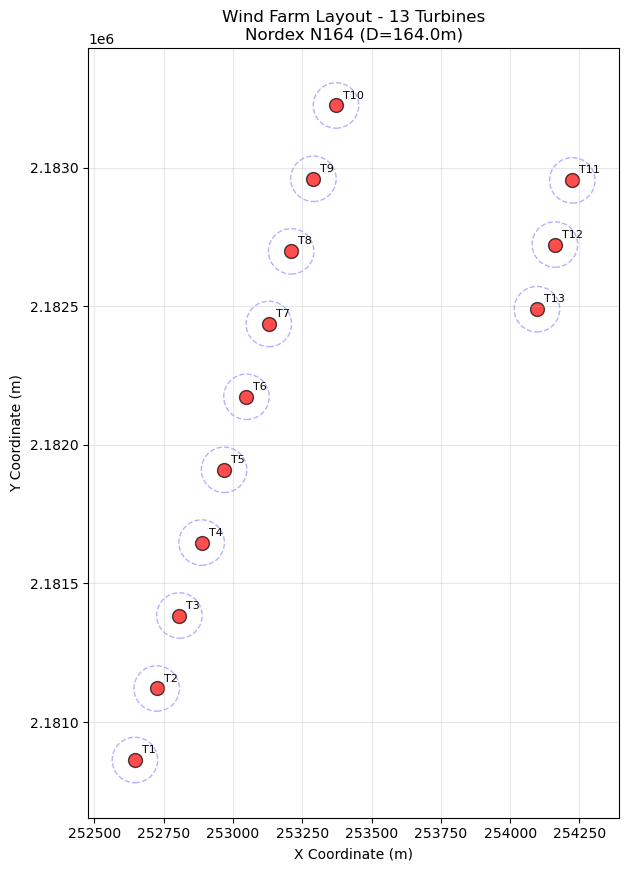


📊 Layout Statistics:
   • Turbines: 13
   • X range: 252647 to 254224 m
   • Y range: 2180863 to 2183224 m
   • Area: 3.72 km²


In [4]:
# 1. Wind Farm Layout Visualization
print("📍 Creating wind farm layout plot...")
fig, ax = wind.plot_layout(figsize=(12, 10))
plt.show()

# Show layout statistics
x, y = wind.turbine_coordinates
print(f"\n📊 Layout Statistics:")
print(f"   • Turbines: {len(x)}")
print(f"   • X range: {x.min():.0f} to {x.max():.0f} m")
print(f"   • Y range: {y.min():.0f} to {y.max():.0f} m")
print(f"   • Area: {(x.max()-x.min()) * (y.max()-y.min()) / 1e6:.2f} km²")


📈 Creating power generation time series...


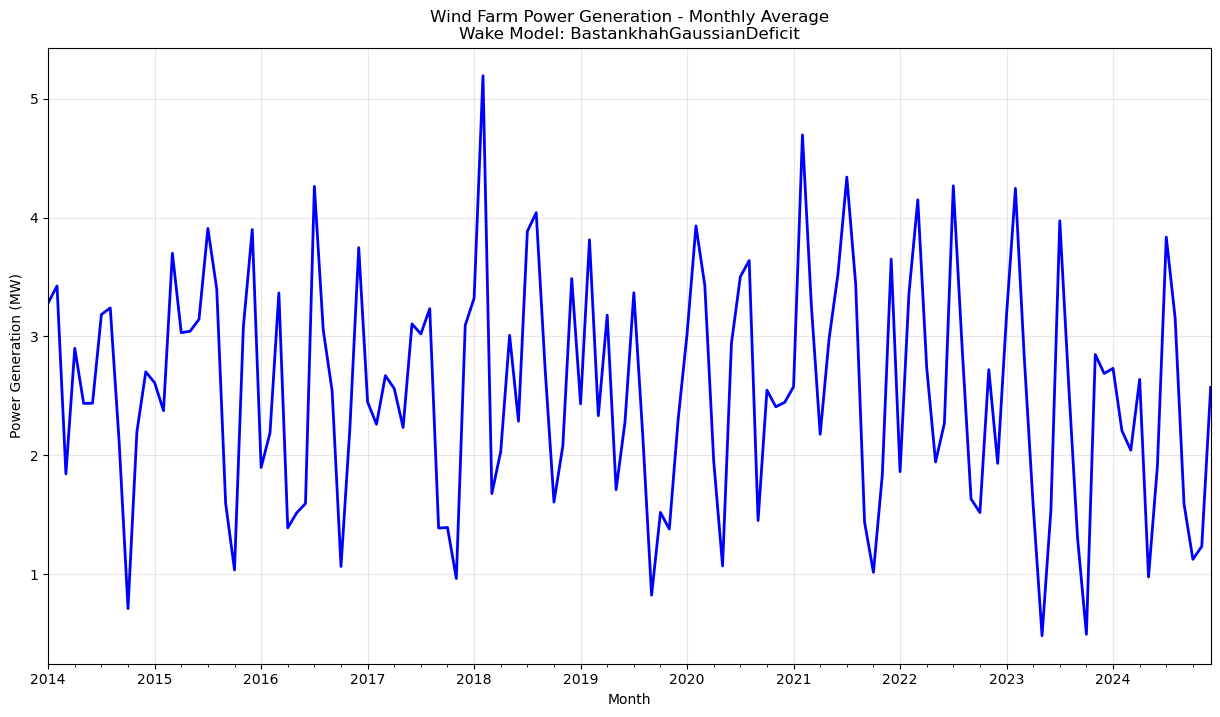


📅 Creating daily time series for detailed view...


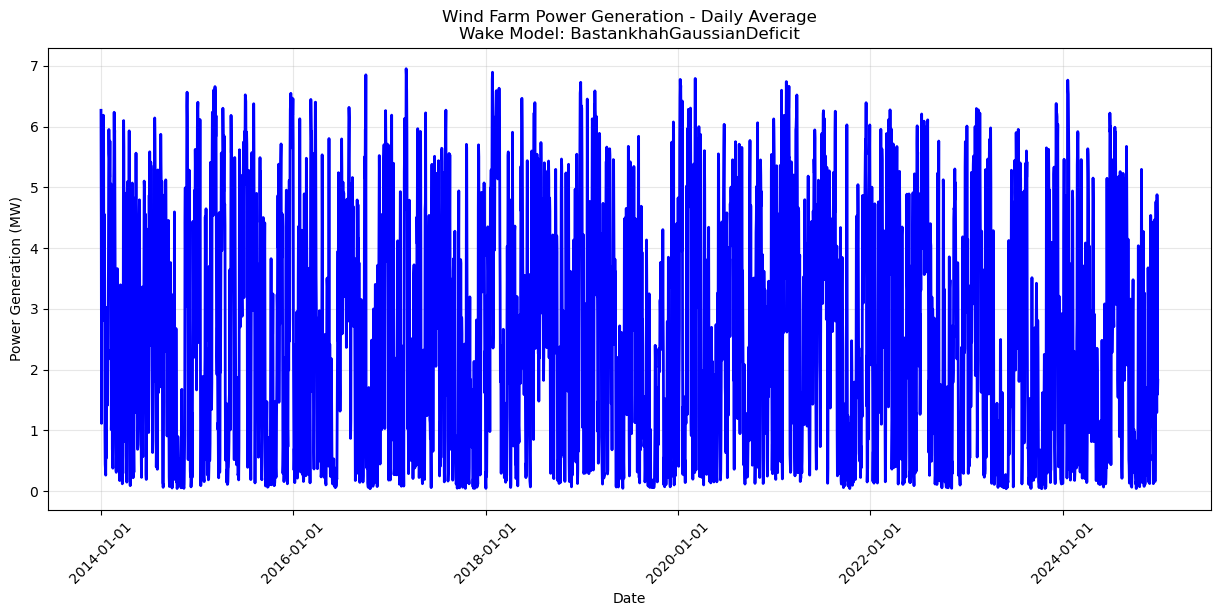

In [5]:
# 2. Power Generation Time Series
print("📈 Creating power generation time series...")

# Monthly average
fig, ax = wind.plot_power_timeseries(period='month', figsize=(15, 8))
plt.show()

# Daily average for first year
print("\n📅 Creating daily time series for detailed view...")
fig, ax = wind.plot_power_timeseries(period='day', figsize=(15, 6))
plt.show()


📊 Creating power distribution analysis...


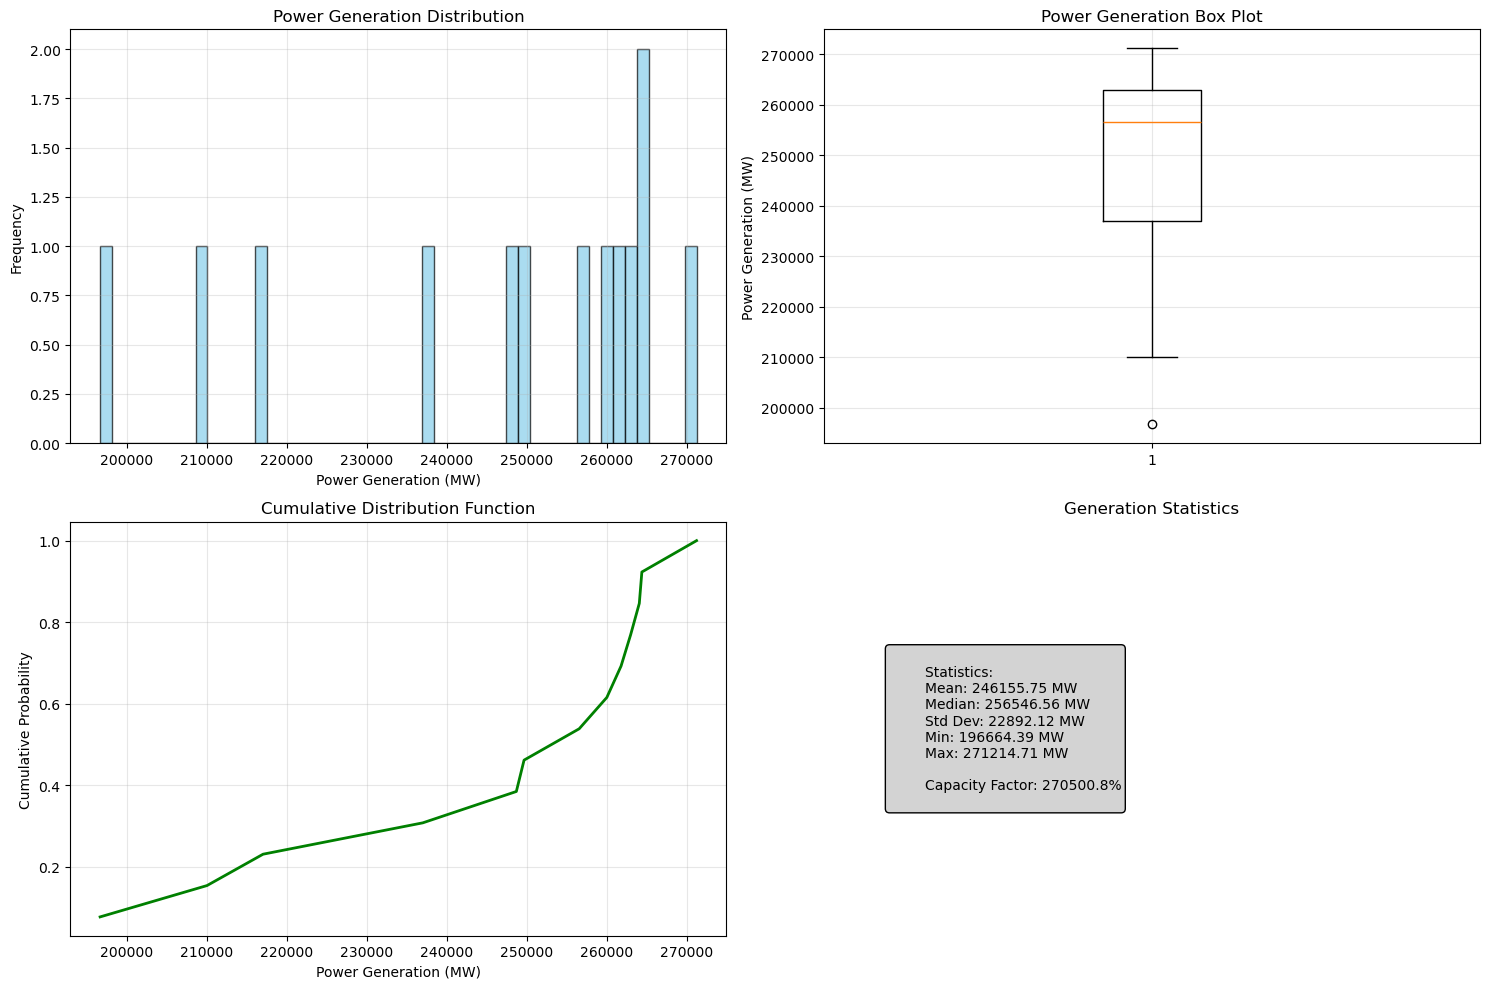


🎯 Key Performance Metrics:
   • Average Power: 246155.7 MW
   • Capacity Factor: 270500.8%
   • Annual Energy: 290.9 GWh
   • Peak Power: 271214.7 MW
   • Minimum Power: 196664.4 MW


In [6]:
# 3. Power Generation Distribution Analysis
print("📊 Creating power distribution analysis...")
fig, axes = wind.plot_power_distribution(figsize=(15, 10))
plt.show()

# Calculate and display key statistics
power_MW = wind.results['total_power_timeseries'] / 1e6
capacity_factor = power_MW.mean() / (len(wind.layout) * config.wind.rated_power_MW)

print(f"\n🎯 Key Performance Metrics:")
print(f"   • Average Power: {power_MW.mean():.1f} MW")
print(f"   • Capacity Factor: {capacity_factor:.1%}")
print(f"   • Annual Energy: {wind.results['annual_energy_GWh']:.1f} GWh")
print(f"   • Peak Power: {power_MW.max():.1f} MW")
print(f"   • Minimum Power: {power_MW.min():.1f} MW")


In [ ]:
# 4. Individual Turbine Performance Analysis
print("🏭 Creating turbine performance comparison...")
fig, axes = wind.plot_turbine_comparison(figsize=(18, 10))
plt.show()

# Identify best and worst performing turbines
power_matrix_MW = wind.results['power_matrix'] / 1e6
turbine_means = power_matrix_MW.mean(axis=0)
best_turbine = np.argmax(turbine_means)
worst_turbine = np.argmin(turbine_means)

print(f"\n🏆 Turbine Performance Analysis:")
print(f"   • Best performing: T{best_turbine+1} ({turbine_means[best_turbine]:.2f} MW avg)")
print(f"   • Worst performing: T{worst_turbine+1} ({turbine_means[worst_turbine]:.2f} MW avg)")
print(f"   • Performance spread: {turbine_means.max() - turbine_means.min():.2f} MW")
print(f"   • Wake losses evident: {'Yes' if (turbine_means.max() - turbine_means.min()) > 0.5 else 'Minimal'}")


🏭 Creating turbine performance comparison...


KeyboardInterrupt: 

In [ ]:
# 5. Wind Rose Analysis
print("🌹 Creating wind rose...")
fig, ax = wind.plot_wind_rose(figsize=(12, 12))
plt.show()

# Wind statistics
wd = wind.site.ds['wind_direction'].values
ws = wind.site.ds['wind_speed'].values

print(f"\n🌬️ Wind Resource Analysis:")
print(f"   • Average wind speed: {ws.mean():.2f} m/s")
print(f"   • Maximum wind speed: {ws.max():.2f} m/s")
print(f"   • Prevailing direction: {np.bincount(np.digitize(wd, np.arange(0, 361, 22.5))).argmax() * 22.5:.0f}°")
print(f"   • Wind speed std dev: {ws.std():.2f} m/s")

# Calculate wind power density
air_density = 1.225  # kg/m³ at sea level
wind_power_density = 0.5 * air_density * (ws**3).mean()
print(f"   • Wind power density: {wind_power_density:.0f} W/m²")


In [ ]:
# 6. Generate All Plots at Once (Optional)
print("🎨 Generating comprehensive analysis plots...")

# Create all plots and save them
figures = wind.plot_comprehensive_analysis(save_dir='wind_analysis_plots')

print(f"\n📁 Generated {len(figures)} plots:")
for name, fig in figures.items():
    print(f"   • {name}: {fig.get_size_inches()[0]:.1f}x{fig.get_size_inches()[1]:.1f} inches")

print("\n💾 All plots saved to 'wind_analysis_plots/' directory")
